# CSPB 4502 - Final Project - Project Wildfire
### Group 3 - Natalie Dreher, Ronald Durham, and Grant Fairbairn

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statistics import mean

In [3]:
# Create data frames from the four CSV files. These will be used to create new DFs below.
df0 = pd.read_csv("firesCleaned_0.csv")
df1 = pd.read_csv("firesCleaned_1.csv")
df2 = pd.read_csv("firesCleaned_2.csv")
df3 = pd.read_csv("firesCleaned_3.csv")

In [3]:
# Visualizing the dataframe for the first 500K entries
df0

,Fire Size Class,Fire Year,Owner Code,Owner Descr,Stat Cause Code,Stat Cause Descr,State,Cont Date,Cont Doy,Cont Time,Discovery Date,Discovery Doy,Discovery Time,Fire Size,Latitude,Longitude,Objectid
0,A,2000,1,BLM,1,Lightning,CO,2451724.5,181.0,1235.0,2451723.5,180,1556.0,0.10,37.321900,-108.443700,351622
1,A,2000,1,BLM,1,Lightning,CO,2451757.5,214.0,1400.0,2451757.5,214,1300.0,0.10,37.250600,-108.345100,351635
2,A,2000,1,BLM,1,Lightning,UT,2451752.5,209.0,1600.0,2451751.5,208,1700.0,0.10,38.533350,-109.797600,353105
3,A,2001,1,BLM,1,Lightning,CO,2452092.5,183.0,1400.0,2452091.5,182,1000.0,0.20,37.230000,-108.327300,351654
4,A,2001,1,BLM,1,Lightning,CO,2452098.5,189.0,30.0,2452097.5,188,2000.0,0.10,40.244280,-108.923400,351443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A,2006,14,MISSING/NOT SPECIFIED,5,Debris Burning,GA,NaN,NaN,NaN,2454087.5,352,NaN,0.13,34.434653,-83.176685,436422
499996,A,2006,14,MISSING/NOT SPECIFIED,5,Debris Burning,GA,NaN,NaN,NaN,2454087.5,352,NaN,0.14,31.337671,-82.847888,442220
499997,A,2006,14,MISSING/NOT SPECIFIED,5,Debris Burning,GA,NaN,NaN,NaN,2454087.5,352,NaN,0.22,32.505170,-82.607000,438068
499998,A,2006,14,MISSING/NOT SPECIFIED,5,Debris Burning,GA,NaN,NaN,NaN,2454088.5,353,NaN,0.01,31.422744,-82.730918,442837


In [4]:
# Creating smaller dataframes to analyze

df0Year = df0['Fire Year']
df1Year = df1['Fire Year']
df2Year = df2['Fire Year']
df3Year = df3['Fire Year']

In [5]:
dfYear1 = pd.concat([df0Year, df1Year])
dfYear2 = pd.concat([df2Year, df3Year])

# Deleting subparts as we go to save memory
del df0Year
del df1Year
del df2Year
del df3Year

In [6]:
dfYear = pd.concat([dfYear1, dfYear2])
del dfYear1
del dfYear2

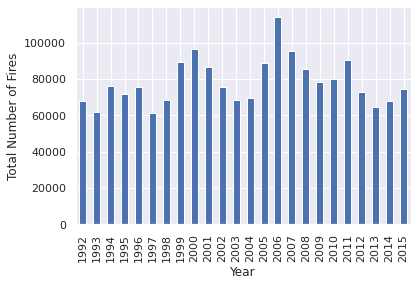

In [7]:
dfYear.value_counts().sort_index().plot(kind='bar');
plt.xlabel("Year");
plt.ylabel("Total Number of Fires");

In [8]:
# Creating a new dataframe holding the years and total fires per year

df = dfYear.value_counts().rename_axis('Year').reset_index(name='Fires')
df = df.sort_values('Year', ignore_index=True)
print(df)

    Year   Fires
0   1992   67975
1   1993   61989
2   1994   75955
3   1995   71473
4   1996   75574
5   1997   61450
6   1998   68370
7   1999   89363
8   2000   96416
9   2001   86587
10  2002   75656
11  2003   68261
12  2004   69279
13  2005   88604
14  2006  114006
15  2007   95573
16  2008   85378
17  2009   78325
18  2010   79889
19  2011   90552
20  2012   72769
21  2013   64780
22  2014   67753
23  2015   74491


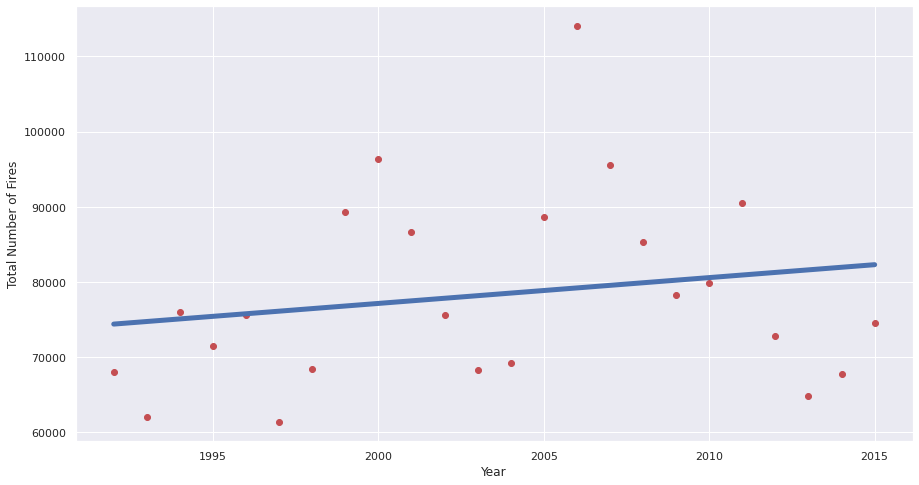

In [9]:
# Creating a model and scatterplot with regression line from the model

model = smf.ols('Fires ~ Year', df).fit()

beta0,beta1 = model.params
plt.figure(figsize=(15,8))
plt.plot(df["Year"], df["Fires"], 'ro');
xticks = np.linspace(1992,2015,10000)
plt.plot(xticks, beta0 + beta1 * xticks, lw=5)
plt.xlabel('Year')
plt.ylabel('Total Number of Fires');

In [10]:
# While the regression line in the scatterplot suggests a slight positive correlation between years and total number of fires (i.e. that fires are increasing in number over time)
# the regression summary shows that the R-squared value is very low at 0.036, the p-value is well above 0.05, and the confidence interval for Year includes 0.
# This suggests that the Year is not a predictor of number of fires.

# That makes sense looking at the scatterplot, because the number of fires jumps around and the results are diffuse. 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Fires   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8265
Date:                Tue, 29 Nov 2022   Prob (F-statistic):              0.373
Time:                        03:12:12   Log-Likelihood:                -260.00
No. Observations:                  24   AIC:                             524.0
Df Residuals:                      22   BIC:                             526.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.095e+05   7.57e+05     -0.806      0.429   -2.18e+06     9.6e+05
Year         343.3443    377.678      0.909      0.373    -439.911    1126.600
==============================================================================
Omnibus:                        5.718   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                3.859
Skew:                           0.938   Prob(JB):                        0.145
Kurtosis:                       3.585   Cond. No.                     5.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df0CauseCode = df0['Stat Cause Code']
df1CauseCode = df1['Stat Cause Code']
df2CauseCode = df2['Stat Cause Code']
df3CauseCode = df3['Stat Cause Code']

In [12]:
dfCauseCode1 = pd.concat([df0CauseCode, df1CauseCode])
dfCauseCode2 = pd.concat([df2CauseCode, df3CauseCode])
del df0CauseCode
del df1CauseCode
del df2CauseCode
del df3CauseCode

In [13]:
dfCauseCode = pd.concat([dfCauseCode1, dfCauseCode2])
del dfCauseCode1
del dfCauseCode2

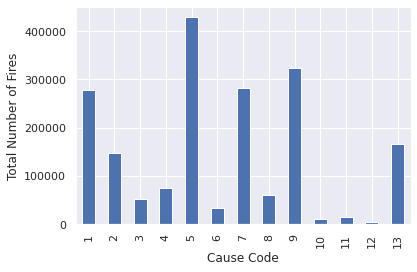

In [14]:
dfCauseCode.value_counts().sort_index().plot(kind='bar');
plt.xlabel("Cause Code");
plt.ylabel("Total Number of Fires");

In [15]:
df0YearCause = df0[['Fire Year','Stat Cause Code']]
df1YearCause = df1[['Fire Year','Stat Cause Code']]
df2YearCause = df2[['Fire Year','Stat Cause Code']]
df3YearCause = df3[['Fire Year','Stat Cause Code']]

In [16]:
dfYearCause1 = pd.concat([df0YearCause, df1YearCause])
dfYearCause2 = pd.concat([df2YearCause, df3YearCause])
dfYearCause = pd.concat([dfYearCause1, dfYearCause2])
del df0YearCause
del df1YearCause
del df2YearCause
del df3YearCause
del dfYearCause1
del dfYearCause2

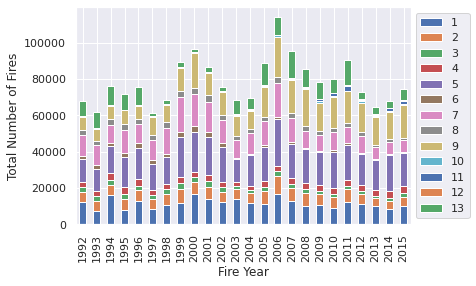

In [17]:
ax = pd.crosstab(dfYearCause['Fire Year'], dfYearCause['Stat Cause Code']).plot(kind='bar', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel("Total Number of Fires");

In [18]:
# Setting up similar stacked bar graph with cause descriptions 

df0YearDescr = df0[['Fire Year','Stat Cause Descr']]
df1YearDescr = df1[['Fire Year','Stat Cause Descr']]
df2YearDescr = df2[['Fire Year','Stat Cause Descr']]
df3YearDescr = df3[['Fire Year','Stat Cause Descr']]

In [19]:
dfYearDescr1 = pd.concat([df0YearDescr, df1YearDescr])
dfYearDescr2 = pd.concat([df2YearDescr, df3YearDescr])
dfYearDescr = pd.concat([dfYearDescr1, dfYearDescr2])
del df0YearDescr
del df1YearDescr
del df2YearDescr
del df3YearDescr
del dfYearDescr1
del dfYearDescr2

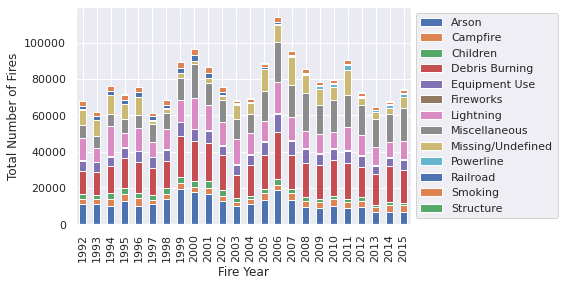

In [20]:
ax = pd.crosstab(dfYearDescr['Fire Year'], dfYearDescr['Stat Cause Descr']).plot(kind='bar', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel("Total Number of Fires");

In [21]:
#working on isolating long and lat for heatmap

In [22]:
df0Geo = df0[['Latitude', 'Longitude']]
df1Geo = df1[['Latitude', 'Longitude']]
df2Geo = df2[['Latitude', 'Longitude']]
df3Geo = df3[['Latitude', 'Longitude']]

In [23]:
dfGeo1 = pd.concat([df0Geo, df1Geo])
dfGeo2 = pd.concat([df2Geo, df3Geo])
dfGeo = pd.concat([dfGeo1, dfGeo2])

## Finding the Average Fire Size By Cause

In [12]:
# Create data frames from the existing subframes with the two columns we need.
df0Cause = df0[['Stat Cause Descr','Fire Size']]
df1Cause = df1[['Stat Cause Descr','Fire Size']]
df2Cause = df2[['Stat Cause Descr','Fire Size']]
df3Cause = df3[['Stat Cause Descr','Fire Size']]

In [13]:
# Concatinate the four data frames down to two.
dfCause1 = pd.concat([df0Cause, df1Cause])
dfCause2 = pd.concat([df2Cause, df3Cause])

# Deleting four original dataframes as they are no uneeded. This will save memory. 
del df0Cause
del df1Cause
del df2Cause
del df3Cause

In [14]:
# Concatinate the two data frames down to one.
dfCause = pd.concat([dfCause1, dfCause2])

# Deleting two midpoint dataframes as they are no uneeded. This will save memory. 
del dfCause1
del dfCause2

In [16]:
# Declaring a dictionary with the keys being the Wildfire Causes and the values being empty
# lists that will be filled with the fire size data.
causeDict = {
    "Arson": [], 
    "Campfire": [], 
    "Children": [], 
    "Debris Burning": [], 
    "Equipment Use": [], 
    "Fireworks": [], 
    "Lightning": [], 
    "Miscellaneous": [], 
    "Missing/Undefined": [], 
    "Powerline": [], 
    "Railroad": [], 
    "Smoking": [], 
    "Structure": []
    }

# Loop the data frame loading the fire sizes into the appropriate causes.
for index, row in dfCause.iterrows():
    causeDict[row[0]].append(row[1])

In [17]:
# Declare empty lists to contain the wildfire causes and their respective averages.
causes = []
means = []

# Loop through the keys and values of the Wildfire Cause dictionary.
for key, value in causeDict.items():
    
    # Append the key to the causes list.
    causes.append(key)
    
    # Check if the length of the array contained in the key is greater than zero.
    if len(causeDict[key]) > 0:
        
        # Append the mean of the current value's list into the means list. 
        # The items in this list will match up with the causes list.
        means.append(np.nanmean(causeDict[key]))
    else:
        means.append(0)

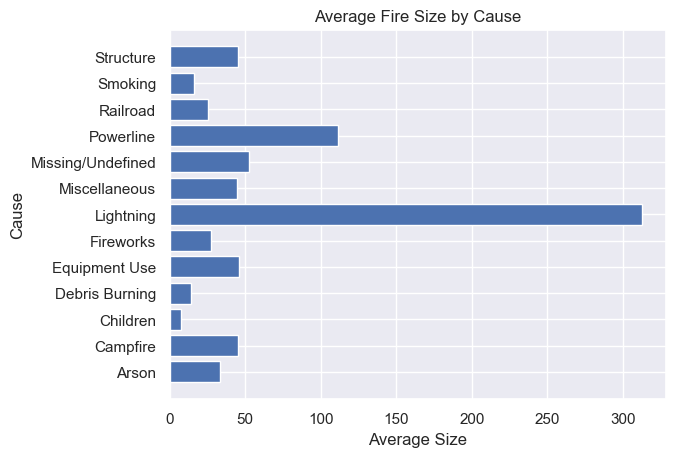

In [18]:
# Plot the data we extracted using matplotlib.
plt.title("Average Fire Size by Cause")
plt.barh(causes, means)

plt.ylabel('Cause')
plt.xlabel('Average Size')

plt.show()

## Finding the Average Size of Lightning Caused Fires by Year

In [35]:
# Create data frames from the existing subframes with the three columns we need.
df0Lightning = df0[['Fire Year', 'Stat Cause Descr','Fire Size']]
df1Lightning = df1[['Fire Year', 'Stat Cause Descr','Fire Size']]
df2Lightning = df2[['Fire Year', 'Stat Cause Descr','Fire Size']]
df3Lightning = df3[['Fire Year', 'Stat Cause Descr','Fire Size']]

In [36]:
# Concatinate the four data frames down to two.
dfLightning1 = pd.concat([df0Lightning, df1Lightning])
dfLightning2 = pd.concat([df2Lightning, df3Lightning])

# Deleting four original dataframes as they are no uneeded. This will save memory. 
del df0Lightning
del df1Lightning
del df2Lightning
del df3Lightning

In [37]:
# Concatinate the two data frames down to one.
dfLightning = pd.concat([dfLightning1, dfLightning2])

# Deleting two midpoint dataframes as they are no uneeded. This will save memory. 
del dfLightning1
del dfLightning2

        Fire Year   Stat Cause Descr  Fire Size
0            2000          Lightning        0.1
1            2000          Lightning        0.1
2            2000          Lightning        0.1
3            2001          Lightning        0.2
4            2001          Lightning        0.1
...           ...                ...        ...
380461       2006  Missing/Undefined     6400.0
380462       2006  Missing/Undefined     6730.0
380463       2010  Missing/Undefined    21620.0
380464       2010  Missing/Undefined    11500.0
380465       2010  Missing/Undefined     9248.0

[1880468 rows x 3 columns]


In [39]:
# Creating an empty dictionary for the lightning fire data.
lightning_years = {}

# Loop through the data frame.
for index, row in dfLightning.iterrows():
    
    # A conditional to test if the wildfire cause is lightning.
    if row[1] == "Lightning":
        
        # Check if the current year has been added to the lightning_years dictionary.
        if row[0] in lightning_years:
            
            # Append the current fire size data to the appropriate year in the dictionary.
            lightning_years[row[0]].append(row[2])
            
        # If the current year isn't in the dictionary then add the year to the dictionary with
        # the current fire size data in a list.
        else:
            lightning_years[row[0]] = [row[2]]
          

In [41]:
# Declare empty lists for the year data and their respective fire size means.
lightning_year = []
lightning_mean = []

# Loop through the keys and values of the lightning_years dictionary sorted by key.
for key, value in sorted(lightning_years.items()):
    
    # Append the year (key) to the lightning_year list. 
    lightning_year.append(key)
    
    # Append the mean (mean of value's list) to the lightning_mean list.
    lightning_mean.append(mean(value))


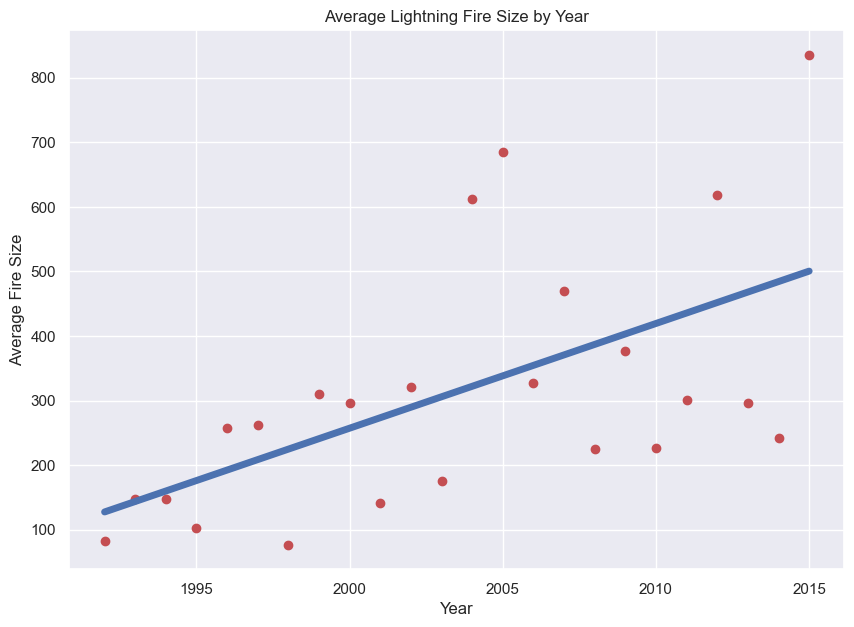

In [47]:
# Create a data frame from the year and mean data from their respective lists.
dfAvgLightning = pd.DataFrame({"Year": lightning_year, "Size": lightning_mean})

# Create an ordinary least squares model for the best fit for the mean data using statsmodels.formula.
model = smf.ols('Size ~ Year', dfAvgLightning).fit()

# Plot the means and OLS line using matplotlib.
beta0,beta1 = model.params
plt.figure(figsize=(10,7))
plt.plot(dfAvgLightning["Year"], dfAvgLightning["Size"], 'ro');
xticks = np.linspace(1992,2015,10000)
plt.plot(xticks, beta0 + beta1 * xticks, lw=5)
plt.title("Average Lightning Fire Size by Year")
plt.xlabel("Year")
plt.ylabel("Average Fire Size");


In [44]:
# Print an OLS summary from statsmodels.formula.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Size   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     11.02
Date:                Tue, 06 Dec 2022   Prob (F-statistic):            0.00312
Time:                        14:59:32   Log-Likelihood:                -155.65
No. Observations:                  24   AIC:                             315.3
Df Residuals:                      22   BIC:                             317.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.217e+04   9786.229     -3.287      0.003   -5.25e+04   -1.19e+04
Year          16.2129      4.885      3.319      0.003       6.083      26.343
==============================================================================
Omnibus:                        2.779   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.090
Skew:                           0.717   Prob(JB):                        0.352
Kurtosis:                       2.821   Cond. No.                     5.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""